<a href="https://colab.research.google.com/github/dineshnaiduavula/MOUnderUncertainity_AssignmentCW2/blob/main/cw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 23s 170ms/step - accuracy: 0.6897 - loss: 0.6324 - val_accuracy: 0.7063 - val_loss: 0.6055
Epoch 2/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 19s 161ms/step - accuracy: 0.7210 - loss: 0.6028 - val_accuracy: 0.7063 - val_loss: 0.6071
Epoch 3/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 20s 161ms/step - accuracy: 0.7237 - loss: 0.5945 - val_accuracy: 0.7063 - val_loss: 0.6056
Epoch 4/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 20s 157ms/step - accuracy: 0.7267 - loss: 0.5924 - val_accuracy: 0.7063 - val_loss: 0.6070
Epoch 5/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 161ms/step - accuracy: 0.7174 - loss: 0.5988 - val_accuracy: 0.7063 - val_loss: 0.6071
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step

Final Evaluation Report
------------------------
Accuracy : 0.74375
Precision: 0.74375
Recall   : 1.0
F1 Score : 0.8530465949820788

Classification Breakdown:
              precision    recall  f1-score   support

 Not Harmful       0.00      0.00      0.00       205
     Harmful       0.74      1.00      0.85       5

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


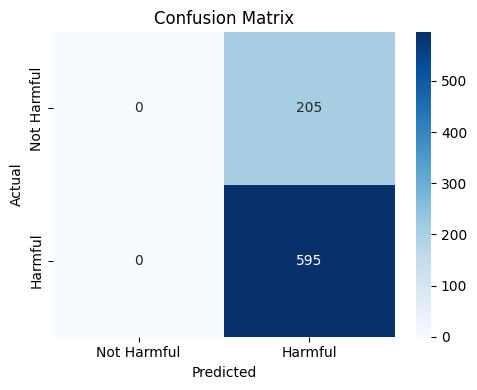

In [1]:
# Step 1: Import required packages
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load dataset from GitHub
file_link = "https://raw.githubusercontent.com/dineshnaiduavula/MOUnderUncertainity_AssignmentCW2/main/TBO_4k_train%20(1).xlsx"
df = pd.read_excel(file_link)

# Step 3: Create binary label based on any harmful tag
harmful_columns = [col for col in df.columns if "Harmful" in col]
df["label"] = df[harmful_columns].apply(lambda row: 1 if "YES" in row.values else 0, axis=1)

# Step 4: Retain only useful columns and clean text
df = df[["text", "label"]].dropna()
df["text"] = df["text"].str.lower()
df["text"] = df["text"].str.replace(r"http\S+|www\S+|@\w+|[^a-zA-Z0-9\s]", "", regex=True)

# Step 5: Tokenize and pad sequences
vocab_limit = 10000
max_length = 100
tokenizer = Tokenizer(num_words=vocab_limit, oov_token="<OOV>")
tokenizer.fit_on_texts(df["text"])
text_sequences = tokenizer.texts_to_sequences(df["text"])
text_padded = pad_sequences(text_sequences, maxlen=max_length, padding="post")

# Step 6: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(text_padded, df["label"], test_size=0.2, random_state=42)

# Step 7: Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=vocab_limit, output_dim=100, input_length=max_length))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# Step 8: Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Step 9: Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Step 10: Make predictions
preds = (model.predict(X_test) > 0.5).astype("int32")

# Step 11: Print evaluation scores
acc_val = accuracy_score(y_test, preds)
prec_val = precision_score(y_test, preds)
rec_val = recall_score(y_test, preds)
f1_val = f1_score(y_test, preds)

print("\nFinal Evaluation Report")
print("------------------------")
print("Accuracy :", acc_val)
print("Precision:", prec_val)
print("Recall   :", rec_val)
print("F1 Score :", f1_val)

# Step 12: Detailed classification report
print("\nClassification Breakdown:")
print(classification_report(y_test, preds, target_names=["Not Harmful", "Harmful"]))

# Step 13: Plot confusion matrix
conf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=["Not Harmful", "Harmful"], yticklabels=["Not Harmful", "Harmful"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
